### <b>Deep Convolutional Generative Adversial Network ~ DGAN: INPUT <b style="color:red">128x128</b></b>

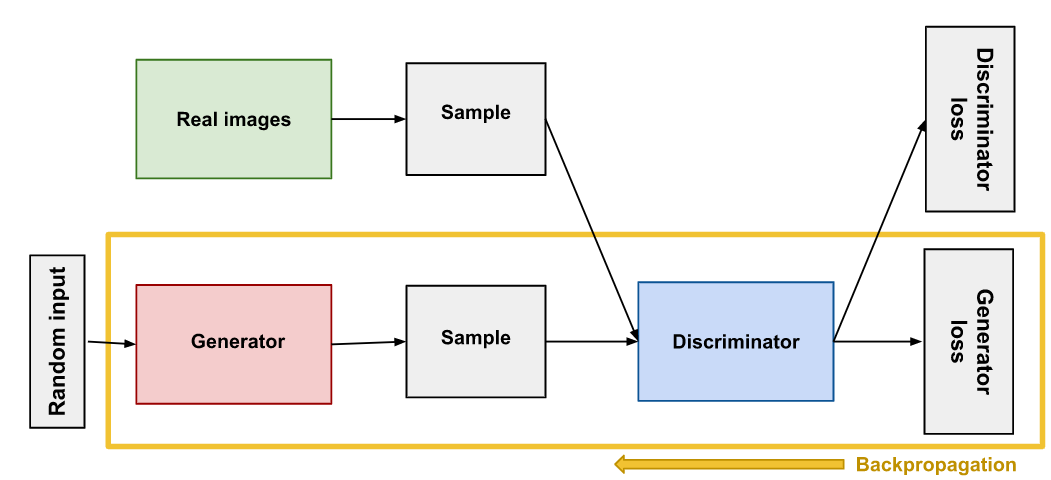
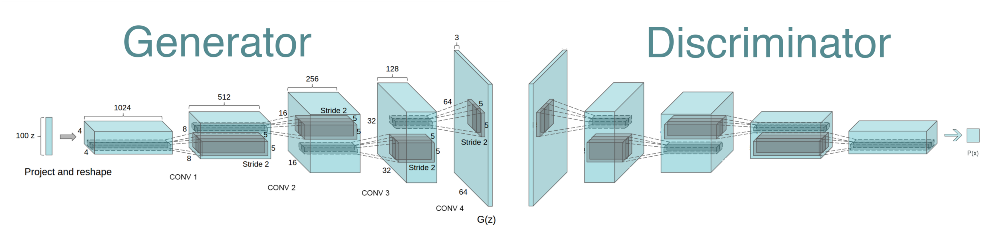
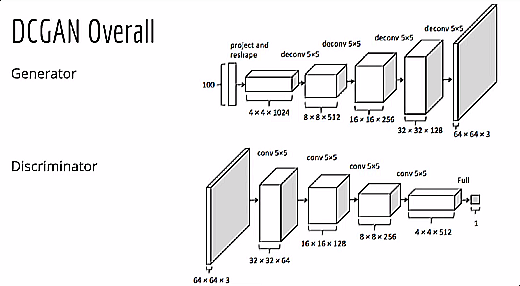
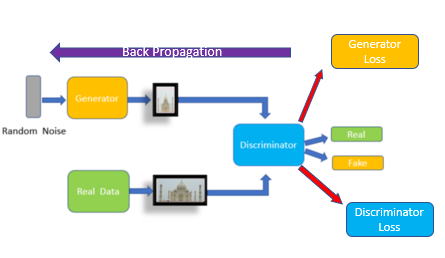

In [33]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchvision import utils
import shutil
import os

In [34]:
class Generator(torch.nn.Module):
    def __init__(self, latent_dimension):
        super(Generator, self).__init__()
        
        # First layer
        self.conv_transpose_2d_01 = torch.nn.ConvTranspose2d(
            in_channels=latent_dimension, out_channels=1024, kernel_size=4,
            stride=1, padding=0, bias=False
        )
        self.batch_norm_2d_01 = torch.nn.BatchNorm2d(num_features=1024)
        self.relu_01 = torch.nn.ReLU(inplace=True)
        
        # Second layer
        self.conv_transpose_2d_02 = torch.nn.ConvTranspose2d(
            in_channels=1024, out_channels=512, kernel_size=4,
            stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_02 = torch.nn.BatchNorm2d(num_features=512)
        self.relu_02 = torch.nn.ReLU(inplace=True)
        
        # Third layer
        self.conv_transpose_2d_03 = torch.nn.ConvTranspose2d(
            in_channels=512, out_channels=256, kernel_size=4,
            stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_03 = torch.nn.BatchNorm2d(num_features=256)
        self.relu_03 = torch.nn.ReLU(inplace=True)
        
        # Fourth layer
        self.conv_transpose_2d_04 = torch.nn.ConvTranspose2d(
            in_channels=256, out_channels=128, kernel_size=4,
            stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_04 = torch.nn.BatchNorm2d(num_features=128)
        self.relu_04 = torch.nn.ReLU(inplace=True)
        
        # Fifth layer
        self.conv_transpose_2d_05 = torch.nn.ConvTranspose2d(
            in_channels=128, out_channels=64, kernel_size=4,
            stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_05 = torch.nn.BatchNorm2d(num_features=64)
        self.relu_05 = torch.nn.ReLU(inplace=True)
        
        # Sixth layer
        self.conv_transpose_2d_06 = torch.nn.ConvTranspose2d(
            in_channels=64, out_channels=3, kernel_size=4,
            stride=2, padding=1, bias=False
        )
        self.tanh = torch.nn.Tanh()
    
    def forward(self, x):
        x = self.conv_transpose_2d_01(x)
        x = self.batch_norm_2d_01(x)
        x = self.relu_01(x)
        
        x = self.conv_transpose_2d_02(x)
        x = self.batch_norm_2d_02(x)
        x = self.relu_02(x)
        
        x = self.conv_transpose_2d_03(x)
        x = self.batch_norm_2d_03(x)
        x = self.relu_03(x)
        
        x = self.conv_transpose_2d_04(x)
        x = self.batch_norm_2d_04(x)
        x = self.relu_04(x)
        
        x = self.conv_transpose_2d_05(x)
        x = self.batch_norm_2d_05(x)
        x = self.relu_05(x)
        
        x = self.conv_transpose_2d_06(x)
        x = self.tanh(x)
        
        return x

In [35]:
class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        # First layer
        self.conv2d_01 = torch.nn.Conv2d(
            in_channels=3, out_channels=64, kernel_size=4, stride=2, padding=1, bias=False
        )
        self.leaky_relu_01 = torch.nn.LeakyReLU(negative_slope=0.2, inplace=True)
        
        # Second layer
        self.conv2d_02 = torch.nn.Conv2d(
            in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_02 = torch.nn.BatchNorm2d(num_features=128)
        self.leaky_relu_02 = torch.nn.LeakyReLU(negative_slope=0.2, inplace=True)
        
        # Third layer
        self.conv2d_03 = torch.nn.Conv2d(
            in_channels=128, out_channels=256, kernel_size=4, stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_03 = torch.nn.BatchNorm2d(num_features=256)
        self.leaky_relu_03 = torch.nn.LeakyReLU(negative_slope=0.2, inplace=True)
        
        # Fourth layer
        self.conv2d_04 = torch.nn.Conv2d(
            in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_04 = torch.nn.BatchNorm2d(num_features=512)
        self.leaky_relu_04 = torch.nn.LeakyReLU(negative_slope=0.2, inplace=True)
        
        # Fifth layer
        self.conv2d_05 = torch.nn.Conv2d(
            in_channels=512, out_channels=1024, kernel_size=4, stride=2, padding=1, bias=False
        )
        self.batch_norm_2d_05 = torch.nn.BatchNorm2d(num_features=1024)
        self.leaky_relu_05 = torch.nn.LeakyReLU(negative_slope=0.2, inplace=True)
        
        # Final classification layer
        self.conv2d_06 = torch.nn.Conv2d(
            in_channels=1024, out_channels=1, kernel_size=4, stride=1, padding=0, bias=False
        )
        self.sigmoid_06 = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.conv2d_01(x)
        x = self.leaky_relu_01(x)
        
        x = self.conv2d_02(x)
        x = self.batch_norm_2d_02(x)
        x = self.leaky_relu_02(x)
        
        x = self.conv2d_03(x)
        x = self.batch_norm_2d_03(x)
        x = self.leaky_relu_03(x)
        
        x = self.conv2d_04(x)
        x = self.batch_norm_2d_04(x)
        x = self.leaky_relu_04(x)
        
        x = self.conv2d_05(x)
        x = self.batch_norm_2d_05(x)
        x = self.leaky_relu_05(x)
        
        x = self.conv2d_06(x)
        x = self.sigmoid_06(x)
        
        return x.view(-1)

In [36]:
class DGAN:
    def __init__(self, latent_dimension=100, learning_rate=0.002, beta_01=0.5):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.image_size =128
        self.latent_dimension = latent_dimension
        self.learning_rate = learning_rate
        self.beta_01 = beta_01
        self.generator_model = Generator(latent_dimension=latent_dimension).to(self.device)
        self.discriminator_model = Discriminator().to(self.device)
        self.criterion = torch.nn.BCELoss()  # Binary cross entropy loss/ BCE
        self.optimizer_generator = torch.optim.Adam(
            self.generator_model.parameters(), 
            lr=learning_rate, 
            betas=(beta_01, 0.999)
        )
        self.optimizer_discriminator = torch.optim.Adam(
            self.discriminator_model.parameters(), 
            lr=learning_rate, 
            betas=(beta_01, 0.999)
        )
    
    def train(self, dataset_path, batch_size=128, number_of_epochs=200, output_images_per_epoch=False):
        # Output images per epoch
        if output_images_per_epoch:
            output_path_training = f"./output_training_gan"
            if os.path.exists(output_path_training):
                shutil.rmtree(output_path_training)  
            os.makedirs(output_path_training, exist_ok=True)

        # Preparing training data
        transform = transforms.Compose([
            transforms.Resize(size=self.image_size),
            transforms.CenterCrop(size=self.image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5], std=[0.5])  # Normalizing to [-1, 1]
        ])

        class_name = str(dataset_path).split("/")[-1]
        tmp_path = f"{dataset_path}/{class_name}_tmp"
        if os.path.exists(tmp_path):
            shutil.rmtree(tmp_path)
        os.mkdir(tmp_path)
        for file in os.listdir(dataset_path):
            if os.path.isfile(f"{dataset_path}/{file}"):
                shutil.copy2(f"{dataset_path}/{file}", tmp_path)

        dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
        data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        # Fixed noise for monitoring generator progress
        fixed_noise = torch.randn(64, self.latent_dimension, 1, 1, device=self.device)

        for epoch in range(number_of_epochs):
            for i, (data, _) in enumerate(data_loader):
                
                # Updating discriminator
                self.discriminator_model.zero_grad()  # Zeroing/clearing gradients
                real_data = data.to(self.device)
                batch_size = real_data.size(0)
                label_real = torch.ones(batch_size, device=self.device)  # [1, 1, ..., batch_size]
                label_fake = torch.zeros(batch_size, device=self.device)  # [0, 0, ..., batch_size]
                
                # Discriminator loss on real data
                output_real = self.discriminator_model(real_data)  # y_predicted
                loss_real = self.criterion(output_real, label_real)  # BCE for real data
                
                # Discriminator loss on fake data
                noise = torch.randn(batch_size, self.latent_dimension, 1, 1, device=self.device)
                fake_data = self.generator_model(noise)
                output_fake = self.discriminator_model(fake_data.detach())  # Detach to avoid backprop through generator
                loss_fake = self.criterion(output_fake, label_fake)  # BCE for fake data
                
                # Total discriminator loss
                loss_discriminator = loss_real + loss_fake
                loss_discriminator.backward()  # Backpropagation for discriminator
                self.optimizer_discriminator.step()  # Updating discriminator weights
                
                # Updating generator
                self.generator_model.zero_grad()  # Zeroing/clearing gradients
                label_gen = torch.ones(batch_size, device=self.device)  # Trick discriminator into believing fakes are real
                output_fake = self.discriminator_model(fake_data)  # Reevaluate fakes
                loss_generator = self.criterion(output_fake, label_gen)
                loss_generator.backward()  # Backpropagation for generator
                self.optimizer_generator.step()  # Updating generator weights
                
                # Logging progress
                if i % 50 == 0:
                    print(f"Epoch [{epoch+1}/{number_of_epochs}] Batch {i}/{len(data_loader)} "
                          f"Loss D: {loss_discriminator:.4f}, Loss G: {loss_generator:.4f}")
            
            # Save generated images after each epoch
            if output_images_per_epoch:
                with torch.no_grad():
                    fake_images = self.generator_model(fixed_noise).detach().cpu()
                    utils.save_image(fake_images, f"{output_path_training}/output_epoch_{epoch+1}.png", normalize=True)
                    print(f"Saved generated images for epoch {epoch+1} as '{output_path_training}/output_epoch_{epoch+1}.png'")
        shutil.rmtree(tmp_path)
                    
    def predict(self, path_to_output_image):
        self.generator_model.eval() # Activating evaluation mode to deactive dropout or batch normalization updates.
        noise = torch.randn(1, self.latent_dimension, 1, 1, device=self.device) # Single image (batch size = 1)
        with torch.no_grad(): # No gradient calculation is necessary/needed
            fake_image = self.generator_model(noise).detach().cpu()
        utils.save_image(fake_image, path_to_output_image, normalize=True)

In [37]:
class DGANBalancer:
    
    def __init__(self):
        pass
    
    def fit(self, path_to_folder, latent_dimension=100, learning_rate=0.002, beta_01=0.5, batch_size=128, number_of_epochs= 200, delta=5):
        self.path_to_folder=path_to_folder        
        directories = os.listdir(path_to_folder)
        real_directories = {}
        to_generate = {}
        for directory in directories:
            if os.path.isdir(f"{path_to_folder}/{directory}"):
                count = len(os.listdir(f"{path_to_folder}/{directory}"))
                real_directories[directory]=count
        max_id = max(real_directories)
        self.total_classes = [key for key in real_directories]
        for directory in real_directories:
            diff = real_directories[max_id] - real_directories[directory]
            if(diff>delta):
                to_generate[directory]=diff
        print(to_generate)
        self.maps = {}
        for key in to_generate:
            count = to_generate[key]
            self.maps[key]=(count, DGAN(
                latent_dimension=latent_dimension, 
                learning_rate=learning_rate, 
                beta_01=beta_01
            ))
        for key in self.maps:
            print(f"{key}: {self.maps[key][0]}, {self.maps[key][1]}")
            dgan_model = self.maps[key][1]
            dgan_model.train(
                dataset_path=f"./dataset/training/imbalanced_flags/{key}",
                batch_size=batch_size,
                number_of_epochs=number_of_epochs
            )
            
    def balance(self, path_to_folder, debug=False):
        for category in self.total_classes:
            source_folder = f"{self.path_to_folder}/{category}"
            destination_folder =f"{path_to_folder}/{category}"
            if os.path.exists(destination_folder) and os.path.isdir(destination_folder):
                shutil.rmtree(destination_folder)
            shutil.copytree(source_folder, destination_folder)
        if debug:
            print(self.maps)
        for category in self.maps:
            last_id = -1
            for file in os.listdir(f"{path_to_folder}/{category}"):
                id = int(file.split("_")[1].split(".")[0])
                if id > last_id:
                    last_id = id
            for i in range(self.maps[category][0]):
                self.maps[category][1].predict(f"{path_to_folder}/{category}/{category}_{last_id}.jpg")
                last_id = last_id + 1
                

In [ ]:
# Configuration.
latent_dimension=100
learning_rate=0.002
beta_01=0.5
batch_size=128 # 128
number_of_epochs=250 # 200
delta=5

# Running the DGANBalancer pipeline.
dgan_balancer = DGANBalancer()
dgan_balancer.fit(
    "./dataset/training/imbalanced_flags/", latent_dimension=latent_dimension, learning_rate=learning_rate, beta_01=beta_01,
    batch_size=batch_size, number_of_epochs=number_of_epochs, delta=delta
)
dgan_balancer.balance("./dataset/training/balanced_flags", debug=True)

{'China': 19, 'Germany': 7, 'India': 57}
China: 19, <__main__.DGAN object at 0x000001B56CDE8450>
Epoch [1/250] Batch 0/1 Loss D: 1.5152, Loss G: 21.7878
Epoch [2/250] Batch 0/1 Loss D: 44.5762, Loss G: 23.9488
Epoch [3/250] Batch 0/1 Loss D: 9.9650, Loss G: 2.9212
Epoch [4/250] Batch 0/1 Loss D: 3.3363, Loss G: 3.2231
Epoch [5/250] Batch 0/1 Loss D: 1.0278, Loss G: 4.3653
Epoch [6/250] Batch 0/1 Loss D: 1.4448, Loss G: 4.3672
Epoch [7/250] Batch 0/1 Loss D: 2.1032, Loss G: 3.9418
Epoch [8/250] Batch 0/1 Loss D: 1.0125, Loss G: 2.5828
Epoch [9/250] Batch 0/1 Loss D: 1.8879, Loss G: 8.9123
Epoch [10/250] Batch 0/1 Loss D: 1.5550, Loss G: 4.4544
Epoch [11/250] Batch 0/1 Loss D: 0.5850, Loss G: 3.2241
Epoch [12/250] Batch 0/1 Loss D: 0.3793, Loss G: 3.8663
Epoch [13/250] Batch 0/1 Loss D: 0.2455, Loss G: 4.6867
Epoch [14/250] Batch 0/1 Loss D: 0.7739, Loss G: 6.8802
Epoch [15/250] Batch 0/1 Loss D: 0.3006, Loss G: 6.2845
Epoch [16/250] Batch 0/1 Loss D: 0.1292, Loss G: 7.3777
Epoch [17/250